In [25]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import math

In [26]:
def normal_distribution(x, mean, sigma):
    return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)
def em(a,mu1,sigma1,w1,mu2,sigma2,w2):
    d=1
    n = len(a)  # 样本长度
    
    # E-step
    #计算响应
    #p1=w1*flot(stats.norm(mu1,sigmal))
    p1 =w1*stats.norm(mu1, sigma1).pdf(a)
    p2=w2*stats.norm(mu2,sigma2).pdf(a)
    #p1, p2权重 * 两个peak的后验概率
    R1i = p1 / (p1 + p2)
    R2i= p2 / (p1 + p2)

    # M-step
    # mu的更新
    #mu1=np.sum(R1i * a)/np.sum(R1i)
    #mu2 = np.sum(R2i * a) / np.sum(R2i)
    #禁用 mu 的更新

    #sigmal的更新
    sigma1=np.sqrt(np.sum(R1i*np.square(a - mu1))/(d*np.sum(R1i)))
    sigma2 = np.sqrt(np.sum(R2i * np.square(a - mu2)) / (d * np.sum(R2i)))
        
    #w的更新
    w1 = np.sum(R1i) / n
    w2 = np.sum(R2i) / n

    return mu1,sigma1,w1,mu2,sigma2,w2

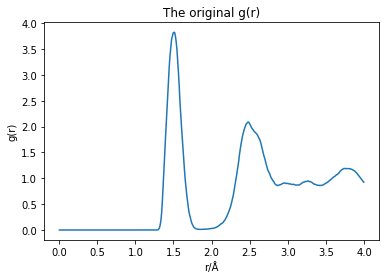

In [27]:
#读取 g(r) 的数据 并绘制原始图片
rdf = np.loadtxt('./rdf-ave.txt')
plt.title('The original g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf[:,0],rdf[:,1],)
plt.show()

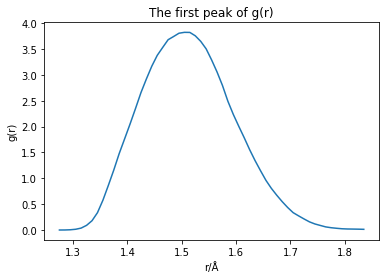

In [28]:
#截取 g(r) 第一峰的数据
rdf_1 = rdf[127:184,:]
plt.title('The first peak of g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf_1[:,0],rdf_1[:,1],)
plt.show()

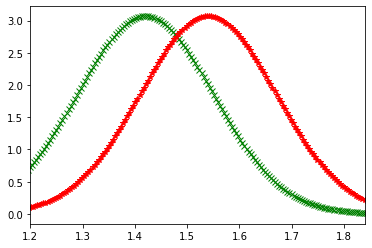

In [29]:
#test of the first value
mean3, sigma3 = 1.42, 0.13
x3 = np.linspace(mean3 - 6*sigma3, mean3 + 6*sigma3, 400)
y3 = normal_distribution(x3, mean3, sigma3)
mean4, sigma4 = 1.54, 0.13
x4 = np.linspace(mean4 - 6*sigma4, mean4 + 6*sigma4, 400)
y4 = normal_distribution(x4, mean4, sigma4)

plt.plot(x3 ,y3 ,'gx' ,label='y3')
plt.plot(x4 ,y4, 'r*' ,label='y4')
plt.xlim(1.2,1.84)
plt.show()

In [34]:
a = rdf_1[:,0]
#GMM的起始值
#Step 1.首先根据经验来分别对Gauss peak 的均值、方差和权值进行初始化
mu1=1.42;sigma1=0.13;w1=0.38#sp2 peak
mu2=1.54;sigma2=0.13;w2=0.61#sp3 peak

d=1
n = len(rdf)  # 样本长度
# 开始EM算法的主循环
for iteration in range(1000):
    mu1,sigma1,w1,mu2,sigma2,w2=em(a,mu1,sigma1,w1,mu2,sigma2,w2)
print(mu1,sigma1,w1,mu2,sigma2,w2)

1.42 0.07807418863407735 0.038052999072373486 1.54 0.1655362278250833 0.9619470009276265


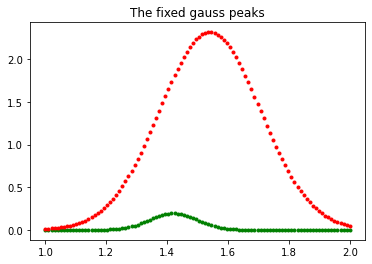

In [35]:
#Draw the fixed gauss
#x1 = np.linspace(mu1 - 1*sigma1, mu1 + 1*sigma1, 400)
x1 = np.linspace(1 ,2 ,100)
y1 = w1*normal_distribution(x1, mu1, sigma1)
#x2 = np.linspace(mu2 - 1*sigma2, mu2 + 1*sigma2, 400)
x2 = np.linspace(1 ,2 ,100)
y2 = w2*normal_distribution(x2, mu2, sigma2)

plt.title('The fixed gauss peaks')
plt.plot(x1 ,y1 ,'g.' ,label='y1')
plt.plot(x2 ,y2, 'r.' ,label='y2')

plt.show()

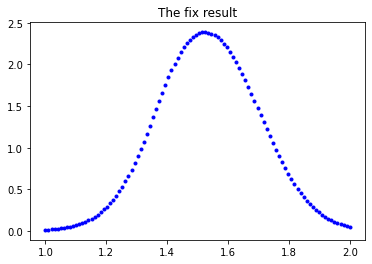

In [36]:
# show the fix result
plt.title('The fix result')
x = (x1 + x2)/2
y = y1 + y2
plt.plot(x ,y ,'b.' ,label='y1')
plt.show()

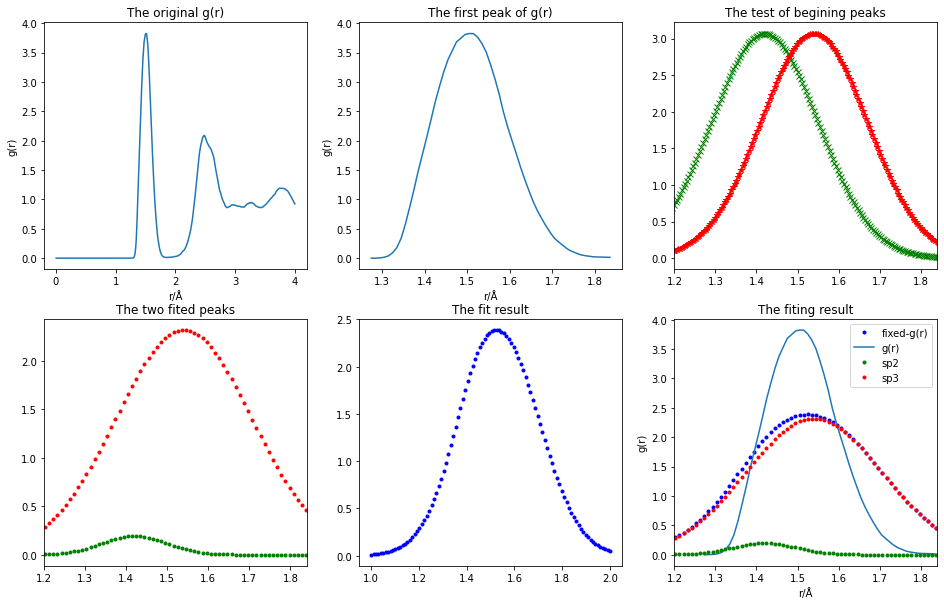

In [37]:
# draw the totel figure
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
plt.title('The original g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf[:,0],rdf[:,1],)

plt.subplot(2,3,2)
plt.title('The first peak of g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf_1[:,0],rdf_1[:,1],)

plt.subplot(2,3,3)
plt.title('The test of begining peaks')
plt.plot(x3 ,y3 ,'gx' ,label='y3')
plt.plot(x4 ,y4, 'r*' ,label='y4')
plt.xlim(1.2,1.84)

plt.subplot(2,3,4)
plt.title('The two fited peaks')
plt.plot(x1 ,y1 ,'g.' ,label='y1')
plt.plot(x2 ,y2, 'r.' ,label='y2')
plt.xlim(1.2,1.84)

plt.subplot(2,3,5)
plt.title('The fit result')
x = (x1 + x2)/2
y = y1 + y2
plt.plot(x ,y ,'b.' ,label='y1')

plt.subplot(2,3,6)
plt.title('The fiting result')
x = (x1 + x2)/2
y = y1 + y2
plt.plot(x ,y ,'b.' ,label='fixed-g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf_1[:,0],rdf_1[:,1],label='g(r)')
plt.plot(x1 ,y1 ,'g.' ,label='sp2')
plt.plot(x2 ,y2, 'r.' ,label='sp3')
plt.legend(loc='upper right')
plt.xlim(1.2,1.84)

plt.show()